In [19]:
#import the packages we will use in this project

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

# Now we need to read in the data
df = pd.read_csv(r"C:\Users\user\Documents\Data analysis\python\movies.csv")


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# Dropping null values

df = df.dropna(subset = ['budget', 'gross'])

In [21]:
# changing the type of columns to int

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [22]:
# creating new colunms

df['new_year'] = df['released'].apply(lambda x: str(x).split('(')[0])
df['new_year'] = pd.to_datetime(df['new_year'], infer_datetime_format = True, format = "mixed", utc=False)
df['year_correct'] = df['new_year'].apply(lambda x: x.year)

df


C:\Users\user\AppData\Local\Temp\ipykernel_3716\3578625582.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['new_year'] = pd.to_datetime(df['new_year'], infer_datetime_format = True, format = "mixed", utc=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_year,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,2020


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 7652
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          5436 non-null   object        
 1   rating        5424 non-null   object        
 2   genre         5436 non-null   object        
 3   year          5436 non-null   int64         
 4   released      5436 non-null   object        
 5   score         5436 non-null   float64       
 6   votes         5436 non-null   float64       
 7   director      5436 non-null   object        
 8   writer        5436 non-null   object        
 9   star          5436 non-null   object        
 10  country       5435 non-null   object        
 11  budget        5436 non-null   int64         
 12  gross         5436 non-null   int64         
 13  company       5434 non-null   object        
 14  runtime       5435 non-null   float64       
 15  new_year      5436 non-null   datetime64[ns

In [167]:
df.sort_values(by=['gross'], inplace = False, ascending= False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_year,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012-05-04,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015-04-03,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019-11-22,2019


In [23]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_year,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,2020


In [32]:
df.reset_index(inplace=True)

<Axes: >

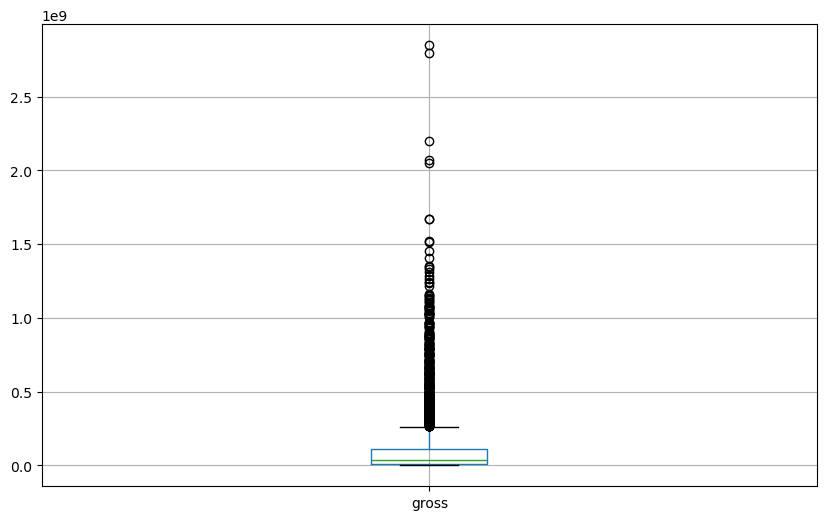

In [9]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<function matplotlib.pyplot.show(close=None, block=None)>

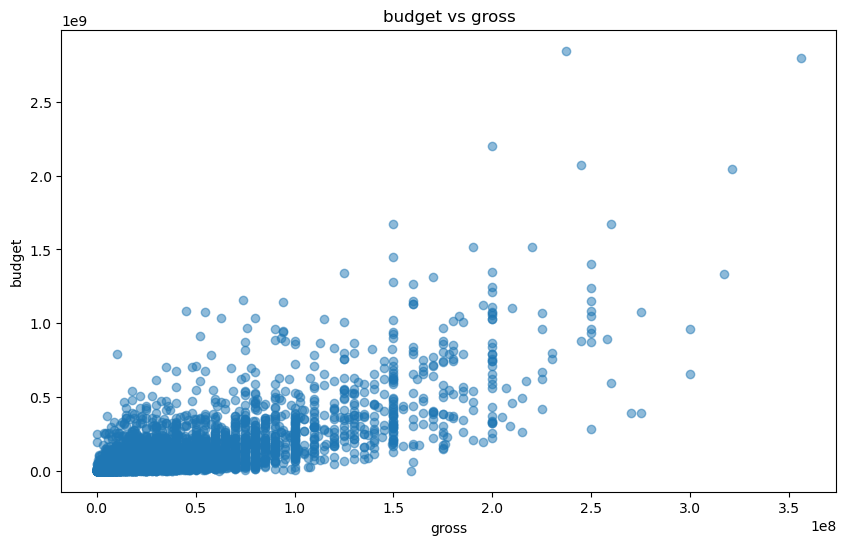

In [168]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('budget vs gross')
plt.xlabel('gross')
plt.ylabel('budget')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

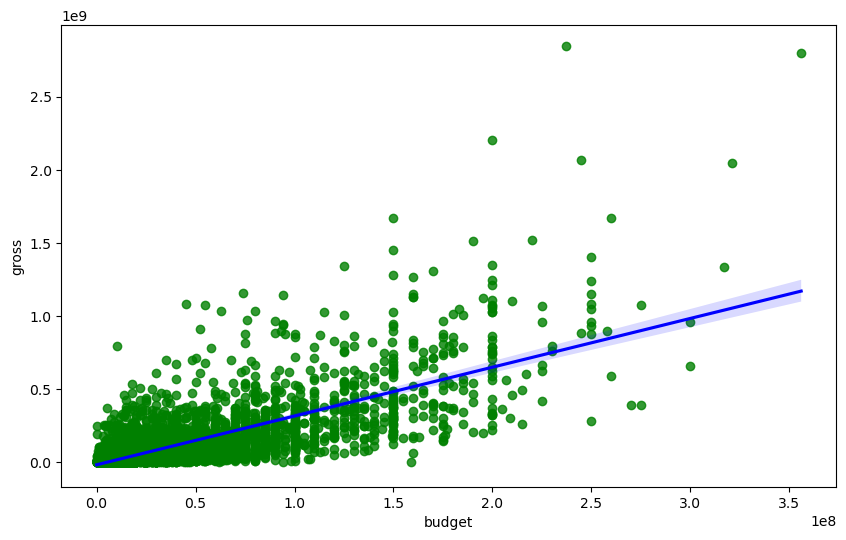

In [169]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})

In [148]:
# Correlation Matrix between all numeric columns

df.corr(method= 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_correct,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [149]:
df.corr(method= 'kendall', numeric_only=True)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106,0.991087
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872,0.042612
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616,0.292588
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879,0.213658
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825,0.232192
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000,0.064120
year_correct,0.991087,0.042612,0.292588,0.213658,0.232192,0.064120,1.000000


In [150]:
df.corr(method= 'spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396,0.998618
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040,0.062508
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959,0.422187
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276,0.302558
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121,0.340211
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000,0.094520
year_correct,0.998618,0.062508,0.422187,0.302558,0.340211,0.094520,1.000000


In [151]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_correct,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

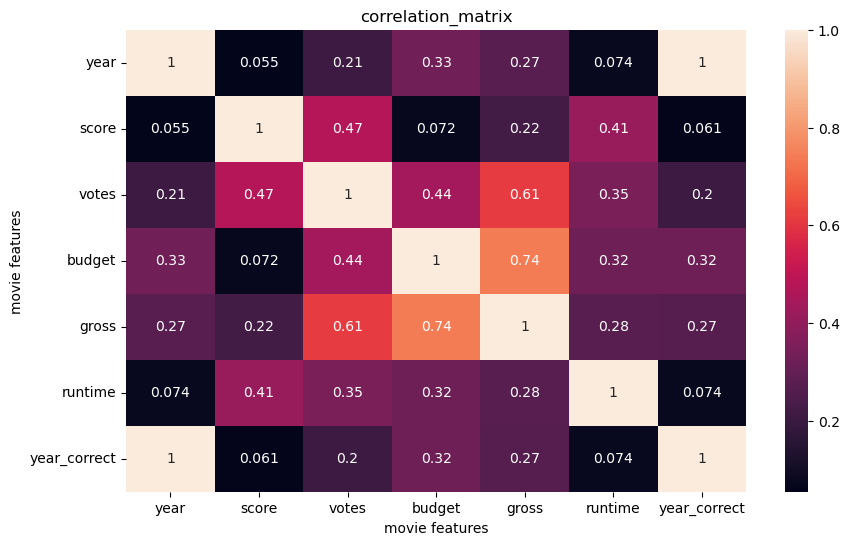

In [12]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation_matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show

In [10]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_year,year_correct
name,1.000000,0.170525,0.028171,0.965587,0.966197,-0.020646,0.295174,0.725025,0.792244,0.694961,0.096024,0.288374,0.968021,0.535803,0.048827,0.966274,0.915803
rating,0.170525,1.000000,-0.116178,0.180042,0.171822,0.035605,0.096117,0.096252,0.128937,0.116250,-0.006310,0.203558,0.173484,-0.027431,0.031162,0.173483,0.167167
genre,0.028171,-0.116178,1.000000,0.031367,0.030976,-0.025599,-0.011119,0.037281,0.033239,0.045507,-0.003864,0.019690,0.031790,0.014914,-0.001004,0.031142,0.031845
year,0.965587,0.180042,0.031367,1.000000,0.996545,-0.015213,0.321913,0.747431,0.812066,0.719185,0.092980,0.318446,0.996425,0.538226,0.055788,0.997504,0.944662
released,0.966197,0.171822,0.030976,0.996545,1.000000,-0.020044,0.311206,0.750442,0.809574,0.719860,0.094779,0.309055,0.998495,0.546430,0.049517,0.999455,0.939591
score,-0.020646,0.035605,-0.025599,-0.015213,-0.020044,1.000000,-0.041147,-0.006937,-0.021886,0.014536,0.015834,-0.006565,-0.016319,-0.009526,0.011966,-0.018749,-0.013106
votes,0.295174,0.096117,-0.011119,0.321913,0.311206,-0.041147,1.000000,0.186192,0.222795,0.180747,-0.021462,0.357144,0.305221,0.006947,0.126941,0.312664,0.311886
director,0.725025,0.096252,0.037281,0.747431,0.750442,-0.006937,0.186192,1.000000,0.717746,0.636307,0.092258,0.122981,0.751338,0.483803,-0.028189,0.750156,0.702654
writer,0.792244,0.128937,0.033239,0.812066,0.809574,-0.021886,0.222795,0.717746,1.000000,0.626436,0.096554,0.206982,0.811078,0.478208,0.022266,0.810693,0.774021
star,0.694961,0.116250,0.045507,0.719185,0.719860,0.014536,0.180747,0.636307,0.626436,1.000000,0.096755,0.137562,0.720568,0.442086,0.032695,0.719803,0.679683


In [13]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes



print(df_numerized)
    

      name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1     3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2     3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3      205       4      4  1980      1131    7.7   221000.0       891    1416   
4      734       6      4  1980      1174    7.3   108000.0       721     352   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7648   416       6      0  2020       907    6.6   140000.0        17    2397   
7649  3569       4      0  2020       715    6.5   102000.0       854    2316   
7650  1156       4      1  2020       907    5.6    53000.0      1814    2836   
7651  3992       4      1  2020       760    6.8    42000.0       296    2096   
7652  4104       3      0  2020       371    6.8     3700.0       748    1186   

      star  country     bud

<function matplotlib.pyplot.show(close=None, block=None)>

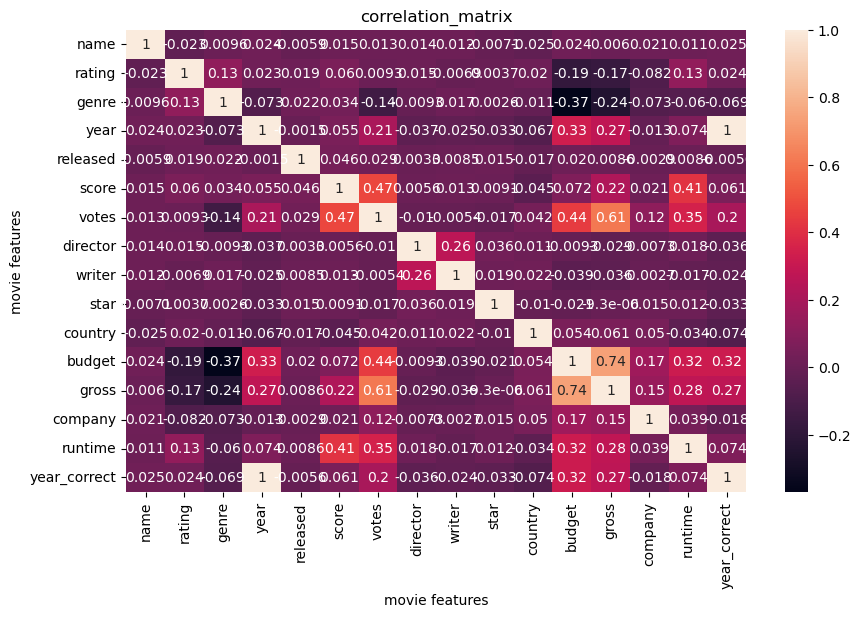

In [14]:
correlation_matrix =df_numerized.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation_matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')

matplotlib.rcParams['figure.figsize'] = (14,11)

plt.show

In [15]:
correlation_mat = df_numerized.corr(numeric_only= True)

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.023013
              genre           0.009617
              year            0.024435
              released       -0.005896
                                ...   
year_correct  budget          0.320245
              gross           0.268626
              company        -0.017823
              runtime         0.074432
              year_correct    1.000000
Length: 256, dtype: float64

In [16]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.368900
genre         budget         -0.368900
              gross          -0.244380
gross         genre          -0.244380
rating        budget         -0.186892
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [17]:
# We can now take a look at the ones that have a high correlation (> 0.5)


high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.614904
votes         gross           0.614904
gross         budget          0.740395
budget        gross           0.740395
year          year_correct    0.998641
year_correct  year            0.998641
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [24]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [26]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64